# INLP - Assignment 2
## Harshavardhan P - 2021111003

In [8]:
import torch
import torch.nn as nn
import conllu
import pandas as pd
import gensim.downloader as api
from torch.utils.data import Dataset, DataLoader
import numpy as np
import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import wandb
import nltk

In [9]:
import fnn_trainer as fnn
import rnn_trainer as rnn
from fnn_trainer import FNNTrainer
from rnn_trainer import RNNTrainer

## Graphs

### FNN

In [10]:
dataset_path_train = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-train.conllu'
dataset_path_dev = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-dev.conllu'
dataset_path_test = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-test.conllu'

dataset_train = conllu.parse_incr(open(dataset_path_train))
dataset_dev = conllu.parse_incr(open(dataset_path_dev))
dataset_test = conllu.parse_incr(open(dataset_path_test))

print('Data Loaded')

# create a dataframe from the data
def create_dataframe(dataset):
    data = []
    for tokenlist in dataset:
        for token in tokenlist:
            # data.append([token['form'], token['upostag']])
            data.append([token['id'], token['form'], token['upostag']])
    # return pd.DataFrame(data, columns=['', 'word', 'pos'])
    return pd.DataFrame(data, columns=['id', 'word', 'pos'])

df_train = create_dataframe(dataset_train)
df_dev = create_dataframe(dataset_dev)
df_test = create_dataframe(dataset_test)

print(len(df_train))
print(len(df_dev))
print(len(df_test))

print('Dataframes Created')

fnn_train = FNNTrainer()
fnn_train.setup_dataloaders(df_train, df_test, df_dev, 2, 2, 'glove-wiki-gigaword-200')
fnn_train.create_model([100, 100])
fnn_train.setup_cr_op('bce', 'adam')
fnn_train.train(30, fnn_train.train_dataloader)
results_test = fnn_train.test(fnn_train.test_dataloader)
results_dev = fnn_train.dev(fnn_train.dev_dataloader)

Data Loaded
48655
6644
6580
Dataframes Created
(48655, 3)
Training Data Preprocessed
Dev/Test Data Preprocessed
Dev/Test Data Preprocessed
Dataloaders Created

Epoch 1


100%|██████████| 761/761 [00:01<00:00, 595.33it/s]


Epoch 1, loss: 0.02985027775859262
Epoch 2


100%|██████████| 761/761 [00:01<00:00, 623.06it/s]


Epoch 2, loss: 0.011612076100201252
Epoch 3


100%|██████████| 761/761 [00:01<00:00, 608.75it/s]


Epoch 3, loss: 0.009898555190028604
Epoch 4


100%|██████████| 761/761 [00:01<00:00, 607.45it/s]


Epoch 4, loss: 0.009286669719131765
Epoch 5


100%|██████████| 761/761 [00:01<00:00, 601.36it/s]


Epoch 5, loss: 0.008649013071397746
Epoch 6


100%|██████████| 761/761 [00:01<00:00, 607.11it/s]


Epoch 6, loss: 0.008342353012578001
Epoch 7


100%|██████████| 761/761 [00:01<00:00, 607.97it/s]


Epoch 7, loss: 0.008149249161633084
Epoch 8


100%|██████████| 761/761 [00:01<00:00, 594.19it/s]


Epoch 8, loss: 0.007762273696718404
Epoch 9


100%|██████████| 761/761 [00:01<00:00, 589.51it/s]


Epoch 9, loss: 0.007543915649111115
Epoch 10


100%|██████████| 761/761 [00:01<00:00, 604.42it/s]


Epoch 10, loss: 0.007440366501306183
Epoch 11


100%|██████████| 761/761 [00:01<00:00, 609.01it/s]


Epoch 11, loss: 0.007394705681182608
Epoch 12


100%|██████████| 761/761 [00:01<00:00, 668.61it/s]


Epoch 12, loss: 0.007170211524956856
Epoch 13


100%|██████████| 761/761 [00:01<00:00, 655.38it/s]


Epoch 13, loss: 0.007031370506249552
Epoch 14


100%|██████████| 761/761 [00:01<00:00, 653.00it/s]


Epoch 14, loss: 0.006933017497438308
Epoch 15


100%|██████████| 761/761 [00:01<00:00, 642.59it/s]


Epoch 15, loss: 0.006703635550877532
Epoch 16


100%|██████████| 761/761 [00:01<00:00, 589.90it/s]


Epoch 16, loss: 0.006801194738562717
Epoch 17


100%|██████████| 761/761 [00:01<00:00, 650.78it/s]


Epoch 17, loss: 0.006692499923810446
Epoch 18


100%|██████████| 761/761 [00:01<00:00, 650.87it/s]


Epoch 18, loss: 0.00655607276582514
Epoch 19


100%|██████████| 761/761 [00:01<00:00, 651.99it/s]


Epoch 19, loss: 0.0067894820141464985
Epoch 20


100%|██████████| 761/761 [00:01<00:00, 660.38it/s]


Epoch 20, loss: 0.006454324124005541
Epoch 21


100%|██████████| 761/761 [00:01<00:00, 627.01it/s]


Epoch 21, loss: 0.006539934665486633
Epoch 22


100%|██████████| 761/761 [00:01<00:00, 677.21it/s]


Epoch 22, loss: 0.006354443917907474
Epoch 23


100%|██████████| 761/761 [00:01<00:00, 643.26it/s]


Epoch 23, loss: 0.0062321284862737565
Epoch 24


100%|██████████| 761/761 [00:01<00:00, 603.77it/s]


Epoch 24, loss: 0.006332126492764446
Epoch 25


100%|██████████| 761/761 [00:01<00:00, 613.58it/s]


Epoch 25, loss: 0.006365040987521978
Epoch 26


100%|██████████| 761/761 [00:01<00:00, 601.96it/s]


Epoch 26, loss: 0.0063486175574365335
Epoch 27


100%|██████████| 761/761 [00:01<00:00, 591.88it/s]


Epoch 27, loss: 0.006202930351604527
Epoch 28


100%|██████████| 761/761 [00:01<00:00, 580.10it/s]


Epoch 28, loss: 0.006124470914025949
Epoch 29


100%|██████████| 761/761 [00:01<00:00, 634.19it/s]


Epoch 29, loss: 0.006221952782624124
Epoch 30


100%|██████████| 761/761 [00:01<00:00, 624.18it/s]


Epoch 30, loss: 0.006241782215630706

Test Set Results:



100%|██████████| 103/103 [00:00<00:00, 1374.67it/s]



Loss: 0.009857011588236082

Accuracy: 0.9785714285714285
Precision: 0.9792217371596836
Recall: 0.9785714285714285
F1 Score: 0.9780413432843328
Dev Set Results:



100%|██████████| 104/104 [00:00<00:00, 1453.95it/s]



Loss: 0.010845975687306445

Accuracy: 0.9748645394340758
Precision: 0.97489608849459
Recall: 0.9748645394340758
F1 Score: 0.9744297370839047


In [11]:
dev_set_acc = []

for context in range(5):
    #import the data files
    dataset_path_train = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-train.conllu'
    dataset_path_dev = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-dev.conllu'
    dataset_path_test = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-test.conllu'

    dataset_train = conllu.parse_incr(open(dataset_path_train))
    dataset_dev = conllu.parse_incr(open(dataset_path_dev))
    dataset_test = conllu.parse_incr(open(dataset_path_test))

    print('Data Loaded')

    # create a dataframe from the data
    def create_dataframe(dataset):
        data = []
        for tokenlist in dataset:
            for token in tokenlist:
                # data.append([token['form'], token['upostag']])
                data.append([token['id'], token['form'], token['upostag']])
        # return pd.DataFrame(data, columns=['', 'word', 'pos'])
        return pd.DataFrame(data, columns=['id', 'word', 'pos'])

    df_train = create_dataframe(dataset_train)
    df_dev = create_dataframe(dataset_dev)
    df_test = create_dataframe(dataset_test)

    print(len(df_train))
    print(len(df_dev))
    print(len(df_test))

    print('Dataframes Created')

    fnn_train = FNNTrainer()
    fnn_train.setup_dataloaders(df_train, df_test, df_dev, context, context, 'glove-wiki-gigaword-200')
    fnn_train.create_model([100, 100])
    fnn_train.setup_cr_op('bce', 'adam')
    fnn_train.train(30, fnn_train.train_dataloader)
    results_test = fnn_train.test(fnn_train.test_dataloader)
    results_dev = fnn_train.dev(fnn_train.dev_dataloader)

    dev_set_acc.append(results_dev['accuracy'])

Data Loaded
48655
6644
6580
Dataframes Created
(48655, 3)
Training Data Preprocessed
Dev/Test Data Preprocessed
Dev/Test Data Preprocessed
Dataloaders Created

Epoch 1


100%|██████████| 761/761 [00:00<00:00, 959.84it/s] 


Epoch 1, loss: 0.03995435693302484
Epoch 2


100%|██████████| 761/761 [00:00<00:00, 820.81it/s]


Epoch 2, loss: 0.019198832778889154
Epoch 3


100%|██████████| 761/761 [00:00<00:00, 968.93it/s]


Epoch 3, loss: 0.01798976588634463
Epoch 4


100%|██████████| 761/761 [00:00<00:00, 948.01it/s] 


Epoch 4, loss: 0.01718773197629899
Epoch 5


100%|██████████| 761/761 [00:00<00:00, 877.89it/s]


Epoch 5, loss: 0.01689871889064835
Epoch 6


100%|██████████| 761/761 [00:00<00:00, 872.43it/s]


Epoch 6, loss: 0.01650821472274607
Epoch 7


100%|██████████| 761/761 [00:00<00:00, 877.58it/s]


Epoch 7, loss: 0.016391829189779567
Epoch 8


100%|██████████| 761/761 [00:00<00:00, 825.66it/s]


Epoch 8, loss: 0.016187785122342868
Epoch 9


100%|██████████| 761/761 [00:00<00:00, 897.82it/s]


Epoch 9, loss: 0.01607735228967093
Epoch 10


100%|██████████| 761/761 [00:00<00:00, 902.45it/s]


Epoch 10, loss: 0.01590548143734355
Epoch 11


100%|██████████| 761/761 [00:00<00:00, 886.13it/s]


Epoch 11, loss: 0.01586268046526936
Epoch 12


100%|██████████| 761/761 [00:00<00:00, 882.16it/s]


Epoch 12, loss: 0.015878882007330716
Epoch 13


100%|██████████| 761/761 [00:00<00:00, 901.39it/s]


Epoch 13, loss: 0.015766381233307668
Epoch 14


100%|██████████| 761/761 [00:00<00:00, 898.31it/s]


Epoch 14, loss: 0.01575887577520113
Epoch 15


100%|██████████| 761/761 [00:00<00:00, 818.42it/s]


Epoch 15, loss: 0.015656323630470446
Epoch 16


100%|██████████| 761/761 [00:00<00:00, 888.15it/s]


Epoch 16, loss: 0.015646919239442135
Epoch 17


100%|██████████| 761/761 [00:00<00:00, 888.63it/s]


Epoch 17, loss: 0.015552026945081846
Epoch 18


100%|██████████| 761/761 [00:00<00:00, 932.14it/s]


Epoch 18, loss: 0.015520819502915702
Epoch 19


100%|██████████| 761/761 [00:00<00:00, 932.27it/s]


Epoch 19, loss: 0.015520844628585261
Epoch 20


100%|██████████| 761/761 [00:00<00:00, 917.67it/s]


Epoch 20, loss: 0.015459668714126006
Epoch 21


100%|██████████| 761/761 [00:00<00:00, 830.82it/s]


Epoch 21, loss: 0.015426834045668254
Epoch 22


100%|██████████| 761/761 [00:00<00:00, 858.67it/s]


Epoch 22, loss: 0.015453260988254057
Epoch 23


100%|██████████| 761/761 [00:01<00:00, 709.80it/s]


Epoch 23, loss: 0.015364462418883118
Epoch 24


100%|██████████| 761/761 [00:00<00:00, 872.89it/s]


Epoch 24, loss: 0.015392488807638062
Epoch 25


100%|██████████| 761/761 [00:00<00:00, 941.39it/s]


Epoch 25, loss: 0.015281276272257371
Epoch 26


100%|██████████| 761/761 [00:00<00:00, 943.75it/s]


Epoch 26, loss: 0.015370538573572595
Epoch 27


100%|██████████| 761/761 [00:00<00:00, 952.76it/s]


Epoch 27, loss: 0.015213838999028687
Epoch 28


100%|██████████| 761/761 [00:00<00:00, 956.74it/s]


Epoch 28, loss: 0.01522143683322851
Epoch 29


100%|██████████| 761/761 [00:00<00:00, 824.28it/s]


Epoch 29, loss: 0.015246039810229421
Epoch 30


100%|██████████| 761/761 [00:00<00:00, 926.75it/s]


Epoch 30, loss: 0.015225795854578155

Test Set Results:



100%|██████████| 103/103 [00:00<00:00, 1980.31it/s]



Loss: 0.017909726996010948

Accuracy: 0.9525835866261398
Precision: 0.9476368111582505
Recall: 0.9525835866261398
F1 Score: 0.9477210152832091
Dev Set Results:



100%|██████████| 104/104 [00:00<00:00, 2254.02it/s]



Loss: 0.01772631558840378

Accuracy: 0.9512341962673089
Precision: 0.9429147147471112
Recall: 0.9512341962673089
F1 Score: 0.9452318112472884
Data Loaded
48655
6644
6580
Dataframes Created
(48655, 3)
Training Data Preprocessed
Dev/Test Data Preprocessed
Dev/Test Data Preprocessed
Dataloaders Created

Epoch 1


100%|██████████| 761/761 [00:01<00:00, 696.50it/s]


Epoch 1, loss: 0.02974667202200344
Epoch 2


100%|██████████| 761/761 [00:01<00:00, 710.25it/s]


Epoch 2, loss: 0.011257741199552392
Epoch 3


100%|██████████| 761/761 [00:01<00:00, 726.02it/s]


Epoch 3, loss: 0.009860194247502358
Epoch 4


100%|██████████| 761/761 [00:01<00:00, 730.11it/s]


Epoch 4, loss: 0.008824086102960526
Epoch 5


100%|██████████| 761/761 [00:01<00:00, 691.85it/s]


Epoch 5, loss: 0.008606501759039716
Epoch 6


100%|██████████| 761/761 [00:01<00:00, 680.72it/s]


Epoch 6, loss: 0.008040241219189614
Epoch 7


100%|██████████| 761/761 [00:01<00:00, 714.69it/s]


Epoch 7, loss: 0.007946709899680625
Epoch 8


100%|██████████| 761/761 [00:01<00:00, 729.54it/s]


Epoch 8, loss: 0.0076854516221311325
Epoch 9


100%|██████████| 761/761 [00:01<00:00, 727.54it/s]


Epoch 9, loss: 0.0074274657564846564
Epoch 10


100%|██████████| 761/761 [00:01<00:00, 687.77it/s]


Epoch 10, loss: 0.0073469586647222735
Epoch 11


100%|██████████| 761/761 [00:01<00:00, 679.04it/s]


Epoch 11, loss: 0.00717380102137171
Epoch 12


100%|██████████| 761/761 [00:01<00:00, 670.08it/s]


Epoch 12, loss: 0.007123052658283417
Epoch 13


100%|██████████| 761/761 [00:01<00:00, 663.31it/s]


Epoch 13, loss: 0.007066088282870638
Epoch 14


100%|██████████| 761/761 [00:01<00:00, 685.27it/s]


Epoch 14, loss: 0.006937599238699715
Epoch 15


100%|██████████| 761/761 [00:01<00:00, 730.62it/s]


Epoch 15, loss: 0.006877305962722968
Epoch 16


100%|██████████| 761/761 [00:01<00:00, 717.19it/s]


Epoch 16, loss: 0.006807051049609657
Epoch 17


100%|██████████| 761/761 [00:01<00:00, 699.80it/s]


Epoch 17, loss: 0.006668374621917117
Epoch 18


100%|██████████| 761/761 [00:01<00:00, 730.01it/s]


Epoch 18, loss: 0.0066675960400882795
Epoch 19


100%|██████████| 761/761 [00:01<00:00, 720.57it/s]


Epoch 19, loss: 0.006666612861218768
Epoch 20


100%|██████████| 761/761 [00:01<00:00, 711.21it/s]


Epoch 20, loss: 0.006596176846824224
Epoch 21


100%|██████████| 761/761 [00:01<00:00, 724.24it/s]


Epoch 21, loss: 0.00663212281973811
Epoch 22


100%|██████████| 761/761 [00:01<00:00, 737.37it/s]


Epoch 22, loss: 0.0066788659026263755
Epoch 23


100%|██████████| 761/761 [00:01<00:00, 729.31it/s]


Epoch 23, loss: 0.006615645467291761
Epoch 24


100%|██████████| 761/761 [00:01<00:00, 736.07it/s]


Epoch 24, loss: 0.006467054671462278
Epoch 25


100%|██████████| 761/761 [00:01<00:00, 649.36it/s]


Epoch 25, loss: 0.006507035397845547
Epoch 26


100%|██████████| 761/761 [00:01<00:00, 673.93it/s]


Epoch 26, loss: 0.006568028991645735
Epoch 27


100%|██████████| 761/761 [00:01<00:00, 682.22it/s]


Epoch 27, loss: 0.006419559282704431
Epoch 28


100%|██████████| 761/761 [00:01<00:00, 704.83it/s]


Epoch 28, loss: 0.006409295864737349
Epoch 29


100%|██████████| 761/761 [00:01<00:00, 661.29it/s]


Epoch 29, loss: 0.006455652248931244
Epoch 30


100%|██████████| 761/761 [00:01<00:00, 711.29it/s]


Epoch 30, loss: 0.006412639914284877

Test Set Results:



100%|██████████| 103/103 [00:00<00:00, 1619.29it/s]



Loss: 0.008209020209055647

Accuracy: 0.982370820668693
Precision: 0.9824232540018276
Recall: 0.982370820668693
F1 Score: 0.9821584345362706
Dev Set Results:



100%|██████████| 104/104 [00:00<00:00, 1828.28it/s]



Loss: 0.009258840871692743

Accuracy: 0.9790788681517159
Precision: 0.9789912633896768
Recall: 0.9790788681517159
F1 Score: 0.9789269366720634
Data Loaded
48655
6644
6580
Dataframes Created
(48655, 3)
Training Data Preprocessed
Dev/Test Data Preprocessed
Dev/Test Data Preprocessed
Dataloaders Created

Epoch 1


100%|██████████| 761/761 [00:01<00:00, 589.69it/s]


Epoch 1, loss: 0.02985027775859262
Epoch 2


100%|██████████| 761/761 [00:01<00:00, 612.01it/s]


Epoch 2, loss: 0.011612076100201252
Epoch 3


100%|██████████| 761/761 [00:01<00:00, 623.01it/s]


Epoch 3, loss: 0.009898555190028604
Epoch 4


100%|██████████| 761/761 [00:01<00:00, 647.12it/s]


Epoch 4, loss: 0.009286669719131765
Epoch 5


100%|██████████| 761/761 [00:01<00:00, 654.94it/s]


Epoch 5, loss: 0.008649013071397746
Epoch 6


100%|██████████| 761/761 [00:01<00:00, 647.65it/s]


Epoch 6, loss: 0.008342353012578001
Epoch 7


100%|██████████| 761/761 [00:01<00:00, 623.71it/s]


Epoch 7, loss: 0.008149249161633084
Epoch 8


100%|██████████| 761/761 [00:01<00:00, 594.60it/s]


Epoch 8, loss: 0.007762273696718404
Epoch 9


100%|██████████| 761/761 [00:01<00:00, 600.23it/s]


Epoch 9, loss: 0.007543915649111115
Epoch 10


100%|██████████| 761/761 [00:01<00:00, 657.27it/s]


Epoch 10, loss: 0.007440366501306183
Epoch 11


100%|██████████| 761/761 [00:01<00:00, 626.01it/s]


Epoch 11, loss: 0.007394705681182608
Epoch 12


100%|██████████| 761/761 [00:01<00:00, 546.84it/s]


Epoch 12, loss: 0.007170211524956856
Epoch 13


100%|██████████| 761/761 [00:01<00:00, 598.55it/s]


Epoch 13, loss: 0.007031370506249552
Epoch 14


100%|██████████| 761/761 [00:01<00:00, 604.24it/s]


Epoch 14, loss: 0.006933017497438308
Epoch 15


100%|██████████| 761/761 [00:01<00:00, 656.58it/s]


Epoch 15, loss: 0.006703635550877532
Epoch 16


100%|██████████| 761/761 [00:01<00:00, 663.27it/s]


Epoch 16, loss: 0.006801194738562717
Epoch 17


100%|██████████| 761/761 [00:01<00:00, 663.14it/s]


Epoch 17, loss: 0.006692499923810446
Epoch 18


100%|██████████| 761/761 [00:01<00:00, 648.64it/s]


Epoch 18, loss: 0.00655607276582514
Epoch 19


100%|██████████| 761/761 [00:01<00:00, 636.56it/s]


Epoch 19, loss: 0.0067894820141464985
Epoch 20


100%|██████████| 761/761 [00:01<00:00, 595.59it/s]


Epoch 20, loss: 0.006454324124005541
Epoch 21


100%|██████████| 761/761 [00:01<00:00, 650.50it/s]


Epoch 21, loss: 0.006539934665486633
Epoch 22


100%|██████████| 761/761 [00:01<00:00, 649.27it/s]


Epoch 22, loss: 0.006354443917907474
Epoch 23


100%|██████████| 761/761 [00:01<00:00, 657.22it/s]


Epoch 23, loss: 0.0062321284862737565
Epoch 24


100%|██████████| 761/761 [00:01<00:00, 610.46it/s]


Epoch 24, loss: 0.006332126492764446
Epoch 25


100%|██████████| 761/761 [00:01<00:00, 590.88it/s]


Epoch 25, loss: 0.006365040987521978
Epoch 26


100%|██████████| 761/761 [00:01<00:00, 497.20it/s]


Epoch 26, loss: 0.0063486175574365335
Epoch 27


100%|██████████| 761/761 [00:01<00:00, 647.99it/s]


Epoch 27, loss: 0.006202930351604527
Epoch 28


100%|██████████| 761/761 [00:01<00:00, 616.86it/s]


Epoch 28, loss: 0.006124470914025949
Epoch 29


100%|██████████| 761/761 [00:01<00:00, 560.65it/s]


Epoch 29, loss: 0.006221952782624124
Epoch 30


100%|██████████| 761/761 [00:01<00:00, 613.27it/s]


Epoch 30, loss: 0.006241782215630706

Test Set Results:



100%|██████████| 103/103 [00:00<00:00, 1251.46it/s]



Loss: 0.009857011588236082

Accuracy: 0.9785714285714285
Precision: 0.9792217371596836
Recall: 0.9785714285714285
F1 Score: 0.9780413432843328
Dev Set Results:



100%|██████████| 104/104 [00:00<00:00, 1371.13it/s]



Loss: 0.010845975687306445

Accuracy: 0.9748645394340758
Precision: 0.97489608849459
Recall: 0.9748645394340758
F1 Score: 0.9744297370839047
Data Loaded
48655
6644
6580
Dataframes Created
(48655, 3)
Training Data Preprocessed
Dev/Test Data Preprocessed
Dev/Test Data Preprocessed
Dataloaders Created

Epoch 1


100%|██████████| 761/761 [00:01<00:00, 553.68it/s]


Epoch 1, loss: 0.03167602245643265
Epoch 2


100%|██████████| 761/761 [00:01<00:00, 529.82it/s]


Epoch 2, loss: 0.011953161712723653
Epoch 3


100%|██████████| 761/761 [00:01<00:00, 553.19it/s]


Epoch 3, loss: 0.01048984966282433
Epoch 4


100%|██████████| 761/761 [00:01<00:00, 493.04it/s]


Epoch 4, loss: 0.00946205782126721
Epoch 5


100%|██████████| 761/761 [00:01<00:00, 539.61it/s]


Epoch 5, loss: 0.009283497412588066
Epoch 6


100%|██████████| 761/761 [00:01<00:00, 578.85it/s]


Epoch 6, loss: 0.008664892745860846
Epoch 7


100%|██████████| 761/761 [00:01<00:00, 534.47it/s]


Epoch 7, loss: 0.008217132812662358
Epoch 8


100%|██████████| 761/761 [00:01<00:00, 529.83it/s]


Epoch 8, loss: 0.007988430022839678
Epoch 9


100%|██████████| 761/761 [00:01<00:00, 536.44it/s]


Epoch 9, loss: 0.007515403786588475
Epoch 10


100%|██████████| 761/761 [00:01<00:00, 520.80it/s]


Epoch 10, loss: 0.007567221263935117
Epoch 11


100%|██████████| 761/761 [00:01<00:00, 514.81it/s]


Epoch 11, loss: 0.007289508122824739
Epoch 12


100%|██████████| 761/761 [00:01<00:00, 531.51it/s]


Epoch 12, loss: 0.007128305092919618
Epoch 13


100%|██████████| 761/761 [00:01<00:00, 537.30it/s]


Epoch 13, loss: 0.0068714330318973135
Epoch 14


100%|██████████| 761/761 [00:01<00:00, 533.85it/s]


Epoch 14, loss: 0.006831770050503086
Epoch 15


100%|██████████| 761/761 [00:01<00:00, 554.91it/s]


Epoch 15, loss: 0.0069422891602757214
Epoch 16


100%|██████████| 761/761 [00:01<00:00, 515.29it/s]


Epoch 16, loss: 0.006568496852586017
Epoch 17


100%|██████████| 761/761 [00:01<00:00, 572.63it/s]


Epoch 17, loss: 0.0067017057502266565
Epoch 18


100%|██████████| 761/761 [00:01<00:00, 550.29it/s]


Epoch 18, loss: 0.0064955612855814105
Epoch 19


100%|██████████| 761/761 [00:01<00:00, 525.32it/s]


Epoch 19, loss: 0.0064689435040545815
Epoch 20


100%|██████████| 761/761 [00:01<00:00, 538.40it/s]


Epoch 20, loss: 0.0062740823371704845
Epoch 21


100%|██████████| 761/761 [00:01<00:00, 536.21it/s]


Epoch 21, loss: 0.006308144923962246
Epoch 22


100%|██████████| 761/761 [00:01<00:00, 537.31it/s]


Epoch 22, loss: 0.006098164015447442
Epoch 23


100%|██████████| 761/761 [00:01<00:00, 535.39it/s]


Epoch 23, loss: 0.006337881368777987
Epoch 24


100%|██████████| 761/761 [00:01<00:00, 545.09it/s]


Epoch 24, loss: 0.0061448527408706245
Epoch 25


100%|██████████| 761/761 [00:01<00:00, 554.38it/s]


Epoch 25, loss: 0.006049042820710807
Epoch 26


100%|██████████| 761/761 [00:01<00:00, 552.62it/s]


Epoch 26, loss: 0.0060812187074446794
Epoch 27


100%|██████████| 761/761 [00:01<00:00, 584.54it/s]


Epoch 27, loss: 0.00613351546034665
Epoch 28


100%|██████████| 761/761 [00:01<00:00, 563.88it/s]


Epoch 28, loss: 0.00604184967806531
Epoch 29


100%|██████████| 761/761 [00:01<00:00, 578.47it/s]


Epoch 29, loss: 0.005965893487944714
Epoch 30


100%|██████████| 761/761 [00:01<00:00, 565.04it/s]


Epoch 30, loss: 0.00596495697788959

Test Set Results:



100%|██████████| 103/103 [00:00<00:00, 1176.98it/s]



Loss: 0.010457268797394647

Accuracy: 0.9776595744680852
Precision: 0.9778366239356057
Recall: 0.9776595744680852
F1 Score: 0.9775079728024211
Dev Set Results:



100%|██████████| 104/104 [00:00<00:00, 1198.24it/s]



Loss: 0.011390104459468812

Accuracy: 0.9739614689945816
Precision: 0.974170058999286
Recall: 0.9739614689945816
F1 Score: 0.9738058277609735
Data Loaded
48655
6644
6580
Dataframes Created
(48655, 3)
Training Data Preprocessed
Dev/Test Data Preprocessed
Dev/Test Data Preprocessed
Dataloaders Created

Epoch 1


100%|██████████| 761/761 [00:01<00:00, 460.07it/s]


Epoch 1, loss: 0.03234720014925414
Epoch 2


100%|██████████| 761/761 [00:01<00:00, 487.15it/s]


Epoch 2, loss: 0.012493356942405996
Epoch 3


100%|██████████| 761/761 [00:01<00:00, 488.96it/s]


Epoch 3, loss: 0.010690717098949313
Epoch 4


100%|██████████| 761/761 [00:01<00:00, 471.17it/s]


Epoch 4, loss: 0.00957265336668601
Epoch 5


100%|██████████| 761/761 [00:01<00:00, 485.79it/s]


Epoch 5, loss: 0.009013592596435076
Epoch 6


100%|██████████| 761/761 [00:01<00:00, 514.59it/s]


Epoch 6, loss: 0.00876214111920779
Epoch 7


100%|██████████| 761/761 [00:01<00:00, 450.36it/s]


Epoch 7, loss: 0.007961252510517654
Epoch 8


100%|██████████| 761/761 [00:01<00:00, 484.93it/s]


Epoch 8, loss: 0.007759260361109776
Epoch 9


100%|██████████| 761/761 [00:01<00:00, 479.21it/s]


Epoch 9, loss: 0.007313176216601985
Epoch 10


100%|██████████| 761/761 [00:01<00:00, 480.48it/s]


Epoch 10, loss: 0.007136522323864851
Epoch 11


100%|██████████| 761/761 [00:01<00:00, 483.29it/s]


Epoch 11, loss: 0.006877643239288805
Epoch 12


100%|██████████| 761/761 [00:01<00:00, 472.79it/s]


Epoch 12, loss: 0.0069220454226163524
Epoch 13


100%|██████████| 761/761 [00:01<00:00, 482.41it/s]


Epoch 13, loss: 0.006456103753767395
Epoch 14


100%|██████████| 761/761 [00:01<00:00, 505.82it/s]


Epoch 14, loss: 0.0067066022818455286
Epoch 15


100%|██████████| 761/761 [00:01<00:00, 535.03it/s]


Epoch 15, loss: 0.006225850153928586
Epoch 16


100%|██████████| 761/761 [00:01<00:00, 535.43it/s]


Epoch 16, loss: 0.0062535476731090545
Epoch 17


100%|██████████| 761/761 [00:01<00:00, 486.68it/s]


Epoch 17, loss: 0.006122315207186661
Epoch 18


100%|██████████| 761/761 [00:01<00:00, 476.87it/s]


Epoch 18, loss: 0.006044619653295021
Epoch 19


100%|██████████| 761/761 [00:01<00:00, 475.91it/s]


Epoch 19, loss: 0.006231040338358876
Epoch 20


100%|██████████| 761/761 [00:01<00:00, 514.86it/s]


Epoch 20, loss: 0.005981109240587982
Epoch 21


100%|██████████| 761/761 [00:01<00:00, 466.51it/s]


Epoch 21, loss: 0.005945946034909111
Epoch 22


100%|██████████| 761/761 [00:01<00:00, 456.71it/s]


Epoch 22, loss: 0.005960591842211433
Epoch 23


100%|██████████| 761/761 [00:01<00:00, 499.11it/s]


Epoch 23, loss: 0.006011480099056375
Epoch 24


100%|██████████| 761/761 [00:01<00:00, 527.18it/s]


Epoch 24, loss: 0.0058185710020722215
Epoch 25


100%|██████████| 761/761 [00:01<00:00, 511.47it/s]


Epoch 25, loss: 0.005798465010758095
Epoch 26


100%|██████████| 761/761 [00:01<00:00, 505.25it/s]


Epoch 26, loss: 0.005901353104636942
Epoch 27


100%|██████████| 761/761 [00:01<00:00, 533.77it/s]


Epoch 27, loss: 0.005795631637824601
Epoch 28


100%|██████████| 761/761 [00:01<00:00, 473.94it/s]


Epoch 28, loss: 0.005898876589372309
Epoch 29


100%|██████████| 761/761 [00:01<00:00, 476.94it/s]


Epoch 29, loss: 0.00584520804584112
Epoch 30


100%|██████████| 761/761 [00:01<00:00, 474.34it/s]


Epoch 30, loss: 0.0057278227847295604

Test Set Results:



100%|██████████| 103/103 [00:00<00:00, 1077.43it/s]



Loss: 0.011145131644969173

Accuracy: 0.9699088145896656
Precision: 0.9698336630400709
Recall: 0.9699088145896656
F1 Score: 0.9691672955175238
Dev Set Results:



100%|██████████| 104/104 [00:00<00:00, 1109.90it/s]



Loss: 0.012940283503177432

Accuracy: 0.9676399759181216
Precision: 0.9674654216954095
Recall: 0.9676399759181216
F1 Score: 0.9669787494722196


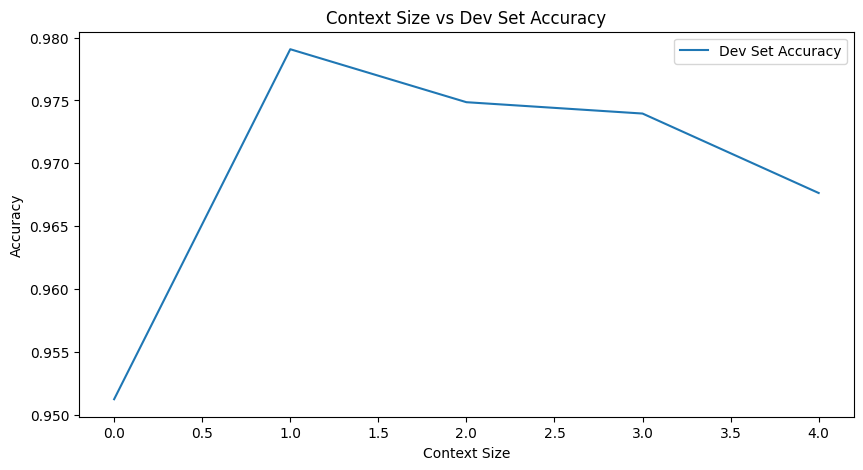

In [12]:
# plotting the graph for context size vs dev set accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(5), dev_set_acc, label='Dev Set Accuracy')
plt.xlabel('Context Size')
plt.ylabel('Accuracy')
plt.title('Context Size vs Dev Set Accuracy')
plt.legend()
plt.show()

### RNN

In [13]:
accs = []
for params in [[100, 'glove-wiki-gigaword-200'], [50, 'glove-wiki-gigaword-200'], [50, 'glove-wiki-gigaword-100']]:
# for params in [[100, 'glove-wiki-gigaword-200']]:
    # import the data files
    dataset_path_train = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-train.conllu'
    dataset_path_dev = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-dev.conllu'
    dataset_path_test = 'ud-treebanks-v2.13/UD_English-Atis/en_atis-ud-test.conllu'

    dataset_train = conllu.parse_incr(open(dataset_path_train))
    dataset_dev = conllu.parse_incr(open(dataset_path_dev))
    dataset_test = conllu.parse_incr(open(dataset_path_test))

    print('Data Loaded')

    # create a dataframe from the data
    def create_dataframe(dataset):
        data = []
        for tokenlist in dataset:
            for token in tokenlist:
                # data.append([token['form'], token['upostag']])
                data.append([token['form'], token['upostag']])
        # return pd.DataFrame(data, columns=['', 'word', 'pos'])
        return pd.DataFrame(data, columns=['word', 'pos'])

    df_train = create_dataframe(dataset_train)
    df_dev = create_dataframe(dataset_dev)
    df_test = create_dataframe(dataset_test)

    print('Dataframes Created')

    rnn_trainer = RNNTrainer()
    rnn_trainer.setup_dataloaders(df_train, df_test, df_dev, params[1])
    rnn_trainer.create_model(params[0])
    rnn_trainer.setup_cr_op('bce', 'adam')
    acc = rnn_trainer.train(20, rnn_trainer.train_dataloader)
    accs.append(acc)

Data Loaded


Dataframes Created
Dataloaders Created
Model Created

Epoch 1/20


100%|██████████| 761/761 [00:03<00:00, 237.82it/s]


Loss: 1/20: 0.04488816646413581


100%|██████████| 104/104 [00:00<00:00, 692.11it/s]


Loss: 0.02486627049690399
Accuracy: 0.9434075857916917
Precision: 0.9335793487059
Recall: 0.9434075857916917
F1: 0.9370223305679708
Epoch 2/20


100%|██████████| 761/761 [00:03<00:00, 223.77it/s]


Loss: 2/20: 0.02226286168661796


100%|██████████| 104/104 [00:00<00:00, 775.07it/s]


Loss: 0.021546058862720832
Accuracy: 0.9494280553883203
Precision: 0.9387383573448579
Recall: 0.9494280553883203
F1: 0.9434117922301295
Epoch 3/20


100%|██████████| 761/761 [00:03<00:00, 220.11it/s]


Loss: 3/20: 0.020314814700009533


100%|██████████| 104/104 [00:00<00:00, 741.36it/s]


Loss: 0.02149584031968306
Accuracy: 0.9509331727874775
Precision: 0.9407596550765301
Recall: 0.9509331727874775
F1: 0.9452591113901758
Epoch 4/20


100%|██████████| 761/761 [00:03<00:00, 239.20it/s]


Loss: 4/20: 0.019790973842912566


100%|██████████| 104/104 [00:00<00:00, 719.02it/s]


Loss: 0.020479464997501615
Accuracy: 0.9543949428055388
Precision: 0.9451170795463111
Recall: 0.9543949428055388
F1: 0.9485811743182139
Epoch 5/20


100%|██████████| 761/761 [00:03<00:00, 233.48it/s]


Loss: 5/20: 0.019196407903113086


100%|██████████| 104/104 [00:00<00:00, 762.69it/s]


Loss: 0.02036932180635631
Accuracy: 0.9539434075857917
Precision: 0.9446991669261355
Recall: 0.9539434075857917
F1: 0.9483113643993082
Epoch 6/20


100%|██████████| 761/761 [00:03<00:00, 231.21it/s]


Loss: 6/20: 0.019004226765630867


100%|██████████| 104/104 [00:00<00:00, 719.17it/s]


Loss: 0.02093737528551943
Accuracy: 0.9518362432269717
Precision: 0.9426033846567872
Recall: 0.9518362432269717
F1: 0.9462136196043573
Epoch 7/20


100%|██████████| 761/761 [00:03<00:00, 227.46it/s]


Loss: 7/20: 0.018810139035832982


100%|██████████| 104/104 [00:00<00:00, 522.13it/s]


Loss: 0.020559214718210008
Accuracy: 0.9549969897652016
Precision: 0.9457386005624764
Recall: 0.9549969897652016
F1: 0.9493599080069661
Epoch 8/20


100%|██████████| 761/761 [00:03<00:00, 229.27it/s]


Loss: 8/20: 0.018670340202034067


100%|██████████| 104/104 [00:00<00:00, 720.25it/s]


Loss: 0.01961214976080765
Accuracy: 0.951685731487056
Precision: 0.9421557955712137
Recall: 0.951685731487056
F1: 0.9458319154425439
Epoch 9/20


100%|██████████| 761/761 [00:03<00:00, 237.08it/s]


Loss: 9/20: 0.018565298976871075


100%|██████████| 104/104 [00:00<00:00, 774.89it/s]


Loss: 0.021399783583966873
Accuracy: 0.9509331727874775
Precision: 0.9419933602296607
Recall: 0.9509331727874775
F1: 0.9452111752904988
Epoch 10/20


100%|██████████| 761/761 [00:03<00:00, 237.37it/s]


Loss: 10/20: 0.018378953472068645


100%|██████████| 104/104 [00:00<00:00, 767.54it/s]


Loss: 0.019945568239423804
Accuracy: 0.9525888019265503
Precision: 0.9420427105395176
Recall: 0.9525888019265503
F1: 0.9468839475935075
Epoch 11/20


100%|██████████| 761/761 [00:03<00:00, 235.78it/s]


Loss: 11/20: 0.01834587998102014


100%|██████████| 104/104 [00:00<00:00, 754.07it/s]


Loss: 0.021179598460618693
Accuracy: 0.9489765201685731
Precision: 0.9403009552821244
Recall: 0.9489765201685731
F1: 0.9432909785222174
Epoch 12/20


100%|██████████| 761/761 [00:03<00:00, 236.21it/s]


Loss: 12/20: 0.018181097351991218


100%|██████████| 104/104 [00:00<00:00, 749.32it/s]


Loss: 0.020938466576178774
Accuracy: 0.9530403371462974
Precision: 0.9439283348415926
Recall: 0.9530403371462974
F1: 0.9473103160042556
Epoch 13/20


100%|██████████| 761/761 [00:03<00:00, 238.14it/s]


Loss: 13/20: 0.01821274900259438


100%|██████████| 104/104 [00:00<00:00, 754.69it/s]


Loss: 0.02001334658752267
Accuracy: 0.9555990367248646
Precision: 0.946357445584515
Recall: 0.9555990367248646
F1: 0.9499464703077503
Epoch 14/20


100%|██████████| 761/761 [00:03<00:00, 236.36it/s]


Loss: 14/20: 0.018066241837910692


100%|██████████| 104/104 [00:00<00:00, 724.05it/s]


Loss: 0.019251368818983722
Accuracy: 0.9545454545454546
Precision: 0.9447951744259568
Recall: 0.9545454545454546
F1: 0.9488744947581609
Epoch 15/20


100%|██████████| 761/761 [00:03<00:00, 238.82it/s]


Loss: 15/20: 0.017912403677324624


100%|██████████| 104/104 [00:00<00:00, 743.71it/s]


Loss: 0.019455618816069685
Accuracy: 0.9531908488862131
Precision: 0.9435490088500941
Recall: 0.9531908488862131
F1: 0.947574352551794
Epoch 16/20


100%|██████████| 761/761 [00:03<00:00, 236.98it/s]


Loss: 16/20: 0.01793636763670314


100%|██████████| 104/104 [00:00<00:00, 743.08it/s]


Loss: 0.0204795599476291
Accuracy: 0.9546959662853702
Precision: 0.9454325065906118
Recall: 0.9546959662853702
F1: 0.949081337828266
Epoch 17/20


100%|██████████| 761/761 [00:03<00:00, 235.14it/s]


Loss: 17/20: 0.017943745127141125


100%|██████████| 104/104 [00:00<00:00, 749.43it/s]


Loss: 0.019793046293601107
Accuracy: 0.9551475015051174
Precision: 0.9457536207800064
Recall: 0.9551475015051174
F1: 0.9494499310195016
Epoch 18/20


100%|██████████| 761/761 [00:03<00:00, 235.18it/s]


Loss: 18/20: 0.01782210190773118


100%|██████████| 104/104 [00:00<00:00, 755.86it/s]


Loss: 0.019775962779441707
Accuracy: 0.9501806140878989
Precision: 0.9409967490040255
Recall: 0.9501806140878989
F1: 0.9444862601473636
Epoch 19/20


100%|██████████| 761/761 [00:03<00:00, 217.17it/s]


Loss: 19/20: 0.01794794519828405


100%|██████████| 104/104 [00:00<00:00, 719.17it/s]


Loss: 0.01973404503839377
Accuracy: 0.9554485249849488
Precision: 0.9460783950584359
Recall: 0.9554485249849488
F1: 0.9497931066443296
Epoch 20/20


100%|██████████| 761/761 [00:03<00:00, 218.35it/s]


Loss: 20/20: 0.01770626034118901


100%|██████████| 104/104 [00:00<00:00, 717.07it/s]


Loss: 0.019562686945741568
Accuracy: 0.9503311258278145
Precision: 0.9401862309625848
Recall: 0.9503311258278145
F1: 0.9445829232135062
Data Loaded
Dataframes Created
Dataloaders Created
Model Created

Epoch 1/20


100%|██████████| 761/761 [00:02<00:00, 269.86it/s]


Loss: 1/20: 0.05524749165515901


100%|██████████| 104/104 [00:00<00:00, 736.66it/s]


Loss: 0.027121038724614594
Accuracy: 0.9423540036122817
Precision: 0.9327508176392846
Recall: 0.9423540036122817
F1: 0.9358865937167168
Epoch 2/20


100%|██████████| 761/761 [00:02<00:00, 270.41it/s]


Loss: 2/20: 0.023104405652917676


100%|██████████| 104/104 [00:00<00:00, 848.15it/s]


Loss: 0.02219218468795029
Accuracy: 0.950632149307646
Precision: 0.9406988789321743
Recall: 0.950632149307646
F1: 0.9444253677631717
Epoch 3/20


100%|██████████| 761/761 [00:02<00:00, 272.47it/s]


Loss: 3/20: 0.020242642742825206


100%|██████████| 104/104 [00:00<00:00, 828.62it/s]


Loss: 0.02102845182749801
Accuracy: 0.9509331727874775
Precision: 0.941277126649685
Recall: 0.9509331727874775
F1: 0.9450226444931356
Epoch 4/20


100%|██████████| 761/761 [00:02<00:00, 273.82it/s]


Loss: 4/20: 0.019168496516786527


100%|██████████| 104/104 [00:00<00:00, 841.91it/s]


Loss: 0.020842969184741378
Accuracy: 0.9498795906080675
Precision: 0.9409538115804522
Recall: 0.9498795906080675
F1: 0.9441606505048491
Epoch 5/20


100%|██████████| 761/761 [00:02<00:00, 268.54it/s]


Loss: 5/20: 0.018620097655411345


100%|██████████| 104/104 [00:00<00:00, 786.11it/s]


Loss: 0.02002588102970129
Accuracy: 0.9533413606261288
Precision: 0.9438739332215819
Recall: 0.9533413606261288
F1: 0.9474623457226158
Epoch 6/20


100%|██████████| 761/761 [00:02<00:00, 264.93it/s]


Loss: 6/20: 0.018202478398658267


100%|██████████| 104/104 [00:00<00:00, 822.29it/s]


Loss: 0.02057084782819192
Accuracy: 0.9497290788681517
Precision: 0.9401498910808277
Recall: 0.9497290788681517
F1: 0.9438645111435565
Epoch 7/20


100%|██████████| 761/761 [00:02<00:00, 253.91it/s]


Loss: 7/20: 0.01805426085914844


100%|██████████| 104/104 [00:00<00:00, 784.44it/s]


Loss: 0.019456059443585288
Accuracy: 0.955900060204696
Precision: 0.9462855920331731
Recall: 0.955900060204696
F1: 0.9502189448006426
Epoch 8/20


100%|██████████| 761/761 [00:03<00:00, 247.71it/s]


Loss: 8/20: 0.017944697991292557


100%|██████████| 104/104 [00:00<00:00, 720.68it/s]


Loss: 0.019553574222999696
Accuracy: 0.955900060204696
Precision: 0.9466214763639825
Recall: 0.955900060204696
F1: 0.9502243908226392
Epoch 9/20


100%|██████████| 761/761 [00:03<00:00, 234.85it/s]


Loss: 9/20: 0.01774243451746697


100%|██████████| 104/104 [00:00<00:00, 693.88it/s]


Loss: 0.020319377354238756
Accuracy: 0.955900060204696
Precision: 0.9466937388181048
Recall: 0.955900060204696
F1: 0.9502488224158886
Epoch 10/20


100%|██████████| 761/761 [00:03<00:00, 228.49it/s]


Loss: 10/20: 0.01782325078453624


100%|██████████| 104/104 [00:00<00:00, 705.89it/s]


Loss: 0.020113106149857722
Accuracy: 0.9518362432269717
Precision: 0.9427679070345631
Recall: 0.9518362432269717
F1: 0.946150817979439
Epoch 11/20


100%|██████████| 761/761 [00:03<00:00, 222.14it/s]


Loss: 11/20: 0.017578041858349422


100%|██████████| 104/104 [00:00<00:00, 691.52it/s]


Loss: 0.019922228171848334
Accuracy: 0.9545454545454546
Precision: 0.9446429731404148
Recall: 0.9545454545454546
F1: 0.9488738156984543
Epoch 12/20


100%|██████████| 761/761 [00:03<00:00, 206.89it/s]


Loss: 12/20: 0.017570678750787338


100%|██████████| 104/104 [00:00<00:00, 652.02it/s]


Loss: 0.01955611922312528
Accuracy: 0.9539434075857917
Precision: 0.9441046907666596
Recall: 0.9539434075857917
F1: 0.9482152951741669
Epoch 13/20


100%|██████████| 761/761 [00:03<00:00, 199.74it/s]


Loss: 13/20: 0.01749324365323177


100%|██████████| 104/104 [00:00<00:00, 593.08it/s]


Loss: 0.019449058445528723
Accuracy: 0.9533413606261288
Precision: 0.9433373979981554
Recall: 0.9533413606261288
F1: 0.9476926244528991
Epoch 14/20


100%|██████████| 761/761 [00:03<00:00, 198.93it/s]


Loss: 14/20: 0.0173423287740807


100%|██████████| 104/104 [00:00<00:00, 636.46it/s]


Loss: 0.01903567423309701
Accuracy: 0.9562010836845274
Precision: 0.9469011488293789
Recall: 0.9562010836845274
F1: 0.9505426814533293
Epoch 15/20


100%|██████████| 761/761 [00:03<00:00, 203.04it/s]


Loss: 15/20: 0.01746320882175759


100%|██████████| 104/104 [00:00<00:00, 615.51it/s]


Loss: 0.019378902224931292
Accuracy: 0.9563515954244431
Precision: 0.946415794018612
Recall: 0.9563515954244431
F1: 0.9507495068089739
Epoch 16/20


100%|██████████| 761/761 [00:03<00:00, 202.62it/s]


Loss: 16/20: 0.017354773485705098


100%|██████████| 104/104 [00:00<00:00, 621.54it/s]


Loss: 0.01940195011243654
Accuracy: 0.9560505719446116
Precision: 0.9464762536712982
Recall: 0.9560505719446116
F1: 0.9503609566286366
Epoch 17/20


100%|██████████| 761/761 [00:03<00:00, 200.82it/s]


Loss: 17/20: 0.017374274413910318


100%|██████████| 104/104 [00:00<00:00, 501.92it/s]


Loss: 0.019890619486642
Accuracy: 0.9528898254063817
Precision: 0.9430551627158208
Recall: 0.9528898254063817
F1: 0.947177223977445
Epoch 18/20


100%|██████████| 761/761 [00:03<00:00, 202.83it/s]


Loss: 18/20: 0.017286194862281407


100%|██████████| 104/104 [00:00<00:00, 601.48it/s]


Loss: 0.019540192530257627
Accuracy: 0.9566526189042746
Precision: 0.9473274140972814
Recall: 0.9566526189042746
F1: 0.9509830164696268
Epoch 19/20


100%|██████████| 761/761 [00:03<00:00, 201.24it/s]


Loss: 19/20: 0.01736886646603473


100%|██████████| 104/104 [00:00<00:00, 596.64it/s]


Loss: 0.020680461575886093
Accuracy: 0.9539434075857917
Precision: 0.9443985123246038
Recall: 0.9539434075857917
F1: 0.9482958632343339
Epoch 20/20


100%|██████████| 761/761 [00:03<00:00, 202.66it/s]


Loss: 20/20: 0.017183621016266155


100%|██████████| 104/104 [00:00<00:00, 620.86it/s]


Loss: 0.019023803752273895
Accuracy: 0.9557495484647802
Precision: 0.9463909885559777
Recall: 0.9557495484647802
F1: 0.9501426557540195
Data Loaded
Dataframes Created
Dataloaders Created
Model Created

Epoch 1/20


100%|██████████| 761/761 [00:03<00:00, 206.00it/s]


Loss: 1/20: 0.05993578373607488


100%|██████████| 104/104 [00:00<00:00, 638.18it/s]


Loss: 0.028666134243114635
Accuracy: 0.9297110174593618
Precision: 0.9209376438652044
Recall: 0.9297110174593618
F1: 0.9217787555214053
Epoch 2/20


100%|██████████| 761/761 [00:03<00:00, 205.21it/s]


Loss: 2/20: 0.024577489109898328


100%|██████████| 104/104 [00:00<00:00, 637.90it/s]


Loss: 0.023967259590370722
Accuracy: 0.9477724262492474
Precision: 0.9386949881716903
Recall: 0.9477724262492474
F1: 0.9414920634407319
Epoch 3/20


100%|██████████| 761/761 [00:03<00:00, 205.61it/s]


Loss: 3/20: 0.02116502408530568


100%|██████████| 104/104 [00:00<00:00, 637.16it/s]


Loss: 0.02174384035438729
Accuracy: 0.9455147501505118
Precision: 0.9349700510738447
Recall: 0.9455147501505118
F1: 0.9395994904950962
Epoch 4/20


100%|██████████| 761/761 [00:03<00:00, 208.84it/s]


Loss: 4/20: 0.01975653286995464


100%|██████████| 104/104 [00:00<00:00, 640.95it/s]


Loss: 0.021548378720091514
Accuracy: 0.9513847080072245
Precision: 0.9420305896330392
Recall: 0.9513847080072245
F1: 0.9455622941295727
Epoch 5/20


100%|██████████| 761/761 [00:03<00:00, 209.94it/s]


Loss: 5/20: 0.019119711999711672


100%|██████████| 104/104 [00:00<00:00, 642.81it/s]


Loss: 0.020632567399073966
Accuracy: 0.9519867549668874
Precision: 0.9414517612813559
Recall: 0.9519867549668874
F1: 0.9463012623049367
Epoch 6/20


100%|██████████| 761/761 [00:03<00:00, 210.00it/s]


Loss: 6/20: 0.01872793805991078


100%|██████████| 104/104 [00:00<00:00, 506.67it/s]


Loss: 0.020197376783471555
Accuracy: 0.9540939193257074
Precision: 0.9435797914610273
Recall: 0.9540939193257074
F1: 0.9483181058540312
Epoch 7/20


100%|██████████| 761/761 [00:03<00:00, 209.13it/s]


Loss: 7/20: 0.01847235310141061


100%|██████████| 104/104 [00:00<00:00, 662.73it/s]


Loss: 0.02048033711840757
Accuracy: 0.9545454545454546
Precision: 0.9449299885193988
Recall: 0.9545454545454546
F1: 0.948842258116213
Epoch 8/20


100%|██████████| 761/761 [00:03<00:00, 206.22it/s]


Loss: 8/20: 0.018267299247166427


100%|██████████| 104/104 [00:00<00:00, 637.57it/s]


Loss: 0.020245896862783972
Accuracy: 0.9522877784467189
Precision: 0.9417924169395767
Recall: 0.9522877784467189
F1: 0.9465363635790252
Epoch 9/20


100%|██████████| 761/761 [00:03<00:00, 208.84it/s]


Loss: 9/20: 0.01818927454746251


100%|██████████| 104/104 [00:00<00:00, 532.20it/s]


Loss: 0.019695886554053195
Accuracy: 0.9540939193257074
Precision: 0.9447193619047477
Recall: 0.9540939193257074
F1: 0.9482940853599087
Epoch 10/20


100%|██████████| 761/761 [00:03<00:00, 207.37it/s]


Loss: 10/20: 0.018047205494954182


100%|██████████| 104/104 [00:00<00:00, 651.27it/s]


Loss: 0.019974441818284012
Accuracy: 0.9563515954244431
Precision: 0.9470675172741727
Recall: 0.9563515954244431
F1: 0.950685448227538
Epoch 11/20


100%|██████████| 761/761 [00:03<00:00, 209.80it/s]


Loss: 11/20: 0.018030554461556044


100%|██████████| 104/104 [00:00<00:00, 623.47it/s]


Loss: 0.01949209089910325
Accuracy: 0.953792895845876
Precision: 0.9441945474377227
Recall: 0.953792895845876
F1: 0.9480075145867688
Epoch 12/20


100%|██████████| 761/761 [00:03<00:00, 201.04it/s]


Loss: 12/20: 0.017950380040649642


100%|██████████| 104/104 [00:00<00:00, 632.50it/s]


Loss: 0.02012511683502593
Accuracy: 0.9555990367248646
Precision: 0.9463161371284977
Recall: 0.9555990367248646
F1: 0.9499241137110186
Epoch 13/20


100%|██████████| 761/761 [00:03<00:00, 200.55it/s]


Loss: 13/20: 0.01781194080120141


100%|██████████| 104/104 [00:00<00:00, 634.42it/s]


Loss: 0.01972827214586477
Accuracy: 0.9545454545454546
Precision: 0.945065658306082
Recall: 0.9545454545454546
F1: 0.9487788205230134
Epoch 14/20


100%|██████████| 761/761 [00:03<00:00, 206.71it/s]


Loss: 14/20: 0.01776006121039097


100%|██████████| 104/104 [00:00<00:00, 631.08it/s]


Loss: 0.019761062307784762
Accuracy: 0.9539434075857917
Precision: 0.944574729756994
Recall: 0.9539434075857917
F1: 0.9482656990365507
Epoch 15/20


100%|██████████| 761/761 [00:03<00:00, 203.63it/s]


Loss: 15/20: 0.01778446446857005


100%|██████████| 104/104 [00:00<00:00, 625.07it/s]


Loss: 0.020124579202204656
Accuracy: 0.9546959662853702
Precision: 0.9453473858197545
Recall: 0.9546959662853702
F1: 0.9489913965961716
Epoch 16/20


100%|██████████| 761/761 [00:03<00:00, 207.74it/s]


Loss: 16/20: 0.01767512613389783


100%|██████████| 104/104 [00:00<00:00, 627.31it/s]


Loss: 0.02085218801557158
Accuracy: 0.9470198675496688
Precision: 0.9376060974191311
Recall: 0.9470198675496688
F1: 0.9412658671460633
Epoch 17/20


100%|██████████| 761/761 [00:03<00:00, 206.92it/s]


Loss: 17/20: 0.01778174223593692


100%|██████████| 104/104 [00:00<00:00, 626.57it/s]


Loss: 0.019744754294291712
Accuracy: 0.949578567128236
Precision: 0.939446857171228
Recall: 0.949578567128236
F1: 0.9436638064486477
Epoch 18/20


100%|██████████| 761/761 [00:03<00:00, 209.96it/s]


Loss: 18/20: 0.017719395035258573


100%|██████████| 104/104 [00:00<00:00, 648.17it/s]


Loss: 0.01974976960963641
Accuracy: 0.9551475015051174
Precision: 0.9460572407096839
Recall: 0.9551475015051174
F1: 0.9494836248337992
Epoch 19/20


100%|██████████| 761/761 [00:03<00:00, 206.56it/s]


Loss: 19/20: 0.017698245854563668


100%|██████████| 104/104 [00:00<00:00, 643.21it/s]


Loss: 0.020826320607179347
Accuracy: 0.9539434075857917
Precision: 0.9447560863595378
Recall: 0.9539434075857917
F1: 0.9482134595337464
Epoch 20/20


100%|██████████| 761/761 [00:03<00:00, 209.61it/s]


Loss: 20/20: 0.01763758746388218


100%|██████████| 104/104 [00:00<00:00, 637.56it/s]

Loss: 0.019638833574180562
Accuracy: 0.954846478025286
Precision: 0.945389260612788
Recall: 0.954846478025286
F1: 0.9491877735762883


In [14]:
print(accs)

[[0.9434075857916917, 0.9494280553883203, 0.9509331727874775, 0.9543949428055388, 0.9539434075857917, 0.9518362432269717, 0.9549969897652016, 0.951685731487056, 0.9509331727874775, 0.9525888019265503, 0.9489765201685731, 0.9530403371462974, 0.9555990367248646, 0.9545454545454546, 0.9531908488862131, 0.9546959662853702, 0.9551475015051174, 0.9501806140878989, 0.9554485249849488, 0.9503311258278145], [0.9423540036122817, 0.950632149307646, 0.9509331727874775, 0.9498795906080675, 0.9533413606261288, 0.9497290788681517, 0.955900060204696, 0.955900060204696, 0.955900060204696, 0.9518362432269717, 0.9545454545454546, 0.9539434075857917, 0.9533413606261288, 0.9562010836845274, 0.9563515954244431, 0.9560505719446116, 0.9528898254063817, 0.9566526189042746, 0.9539434075857917, 0.9557495484647802], [0.9297110174593618, 0.9477724262492474, 0.9455147501505118, 0.9513847080072245, 0.9519867549668874, 0.9540939193257074, 0.9545454545454546, 0.9522877784467189, 0.9540939193257074, 0.9563515954244431,

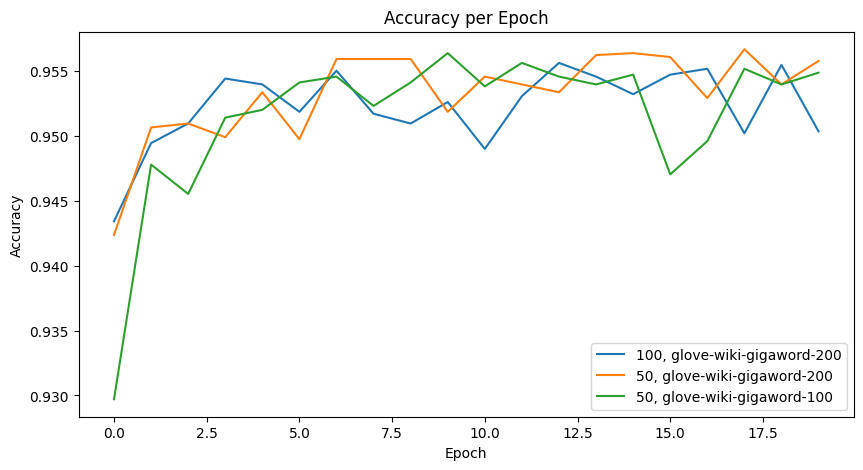

In [15]:
# plot the graphs comparing accuracy per epoch for different params
plt.figure(figsize=(10, 5))
plt.plot(range(20), accs[0], label='100, glove-wiki-gigaword-200')
plt.plot(range(20), accs[1], label='50, glove-wiki-gigaword-200')
plt.plot(range(20), accs[2], label='50, glove-wiki-gigaword-100')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()